In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 

In [ ]:
#Network training parameters
EPOCHS=200
BATCH_SIZE=128
VERBOSE=1
NB_CLASSES=10
N_HIDDEN=128
VALIDATION_SPLIT=0.2
RESHAPED=784

In [ ]:
#LOADING MNIST DATASETS
mnist = keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Normalization input to be within in [0,1]
X_train /= 255
X_test /= 255

In [ ]:
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [ ]:
#One-hot representation of the labels


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(RESHAPED,),name='dense_layer',activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, callbacks=None, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 4s 3ms/step - loss: 0.7484 - accuracy: 0.8185 - val_loss: 0.4090 - val_accuracy: 0.8971
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3894 - accuracy: 0.8958 - val_loss: 0.3341 - val_accuracy: 0.9096
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.9075 - val_loss: 0.3072 - val_accuracy: 0.9144
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.9132 - val_loss: 0.2930 - val_accuracy: 0.9189
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.9161 - val_loss: 0.2841 - val_accuracy: 0.9199
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.9189 - val_loss: 0.2791 - val_accuracy: 0.9226
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2834 - accuracy: 0.9211 - val_loss: 0.2746 - val_accuracy: 0.9241

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.9249
Test accuracy: 0.9248999953269958


In [ ]:
#@title Improving the simple net with Hidden layers 
#@ Improving the simple net with Hidden layers 


In [ ]:
EPOCHS=50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
RESHAPED=784

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
print(X_train.shape[0],'train samp')
print(X_test.shape[0],'test samp')

60000 train samp
10000 test samp


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test,NB_CLASSES)

In [ ]:
# Build the model
model = tf.keras.models.Sequential()


In [ ]:
model.add(keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPED,), name='dense_layer',activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPED,), name='dense_layer_2',activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,input_shape=(RESHAPED,), name='dense_layer_3',activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_split=VALIDATION_SPLIT,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=VERBOSE)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3560 - accuracy: 0.8994 - val_loss: 0.1732 - val_accuracy: 0.9517
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1480 - accuracy: 0.9570 - val_loss: 0.1405 - val_accuracy: 0.9592
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9705 - val_loss: 0.1131 - val_accuracy: 0.9652
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9772 - val_loss: 0.0982 - val_accuracy: 0.9714
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0969 - val_accuracy: 0.9724
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.1060 - val_accuracy: 0.9689
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.9893 - val_loss: 0.1028 - val_accuracy: 0.9715
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1331 - accuracy: 0.9813


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9812999963760376


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
EPOCHS=200
BATCH_SIZE=128
VERBOSE=1
NB_CLASSES=10
N_HIDDEN=128
VALIDATION_SPLIT=0.2
DROPOUT=0.3

In [ ]:
# Loading mnist dataset
mnist = keras.datasets.mnist
RESHAPED=784

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0],RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape[0],'train_samp')
print(X_test.shape[0],'test_samp')

60000 train_samp
10000 test_samp


In [ ]:
# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,name='dense_layer',input_shape=(RESHAPED,),activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,name='dense_layer_2',activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,name='dense_layer_3',activation='softmax'))

In [ ]:
# Summary the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
model.fit(X_train,y_train,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,batch_size=BATCH_SIZE)

Epoch 1/200
375/375 [==============================] - 5s 5ms/step - loss: 0.5130 - acc: 0.8435 - val_loss: 0.1884 - val_acc: 0.9461
Epoch 2/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2284 - acc: 0.9319 - val_loss: 0.1328 - val_acc: 0.9603
Epoch 3/200
375/375 [==============================] - 2s 4ms/step - loss: 0.1765 - acc: 0.9475 - val_loss: 0.1177 - val_acc: 0.9647
Epoch 4/200
375/375 [==============================] - 2s 4ms/step - loss: 0.1483 - acc: 0.9548 - val_loss: 0.0999 - val_acc: 0.9697
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.1298 - acc: 0.9595 - val_loss: 0.0993 - val_acc: 0.9694
Epoch 6/200
375/375 [==============================] - 2s 4ms/step - loss: 0.1170 - acc: 0.9643 - val_loss: 0.0932 - val_acc: 0.9720
Epoch 7/200
375/375 [==============================] - 2s 4ms/step - loss: 0.1050 - acc: 0.9669 - val_loss: 0.0900 - val_acc: 0.9744
Epoch 8/200
375/375 [==============================] - 2s 4ms/step - 

In [ ]:
import pandas as pd
result = pd.DataFrame(model.history.history)

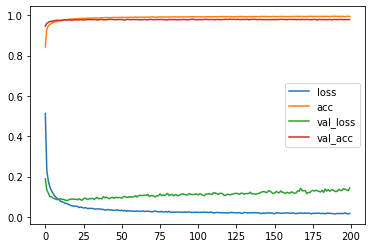

In [ ]:
result.plot()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1324 - acc: 0.9805


In [ ]:
print('Test accuracy:',test_acc)

Test accuracy: 0.9804999828338623
